<a href="https://colab.research.google.com/github/GiorgosFrag24/Traffic-Sign-Recognition/blob/main/train.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [5]:
# Placeholders for training data
data = []
labels = []
classes = 43
cur_path = r'/content/drive/MyDrive/Traffic Sign Recognition'


In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from PIL import Image
from PIL import ImageFilter
import os
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from keras.models import Model

In [3]:

# Define a Gaussian noise function
def noise(image):
    row,col,ch= image.shape      
    gauss = np.array(image.shape)
    gauss = np.random.standard_normal(size=(row,col,ch))
    noisy = image + 0.1*255*gauss
    return noisy
    

# Model creator function
def create_model(neurons = 256, dropout = 0.1, filters=16, kernels=[(5,5),(3,3)],optimizer='adam'):
    model = Sequential()
    model.add(Conv2D(filters=filters, kernel_size=kernels[0], 
                    activation='relu', input_shape=(30,30,3) )) 
    model.add(MaxPool2D(pool_size=(2,2)))
    model.add(Dropout(rate=dropout))
    model.add(Conv2D(filters=filters*2, kernel_size=kernels[1], activation='relu'))
    model.add(MaxPool2D(pool_size=(2,2)))
    model.add(Dropout(rate=dropout))
    model.add(Flatten())
    model.add(Dense(neurons, activation='relu'))
    model.add(Dropout(rate=dropout))
    model.add(Dense(43, activation='softmax'))

    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

In [ ]:
# DON'T EXECUTE!!!
# Load Training images and their respective labels
for i in range(0,43):
    path = os.path.join(cur_path,'GTSRB/Training',str(i).zfill(5))
    images = os.listdir(path)    
    for a in images:
        try:
            if a.endswith('.csv'):
              continue
            image = Image.open(path + '/'+ a)
            image = image.resize((30,30))
            image = np.array(image)
            data.append(image)
            labels.append(i)
        except Exception as inst:
            print(inst)
            continue

# Store training data 
data = np.array(data)
labels = np.array(labels)
#np.save( os.path.join(cur_path,'data.npy'), data)
#np.save(os.path.join(cur_path,'labels.npy'), labels)

In [6]:
# Load training data from disk
data = np.load(os.path.join(cur_path,'data.npy'))
labels = np.load(os.path.join(cur_path,'labels.npy'))

# Split training data to train and validation
X = data
y = labels
X_train, X_val, y_train, y_val = train_test_split(data, labels, test_size=0.2, random_state=42)

# Convert labels to one-hot encoding
y_train = to_categorical(y_train, 43)
y_val = to_categorical(y_val, 43)


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 16)        1216      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 16)        0         
_________________________________________________________________
dropout (Dropout)            (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 5, 5, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 800)               0

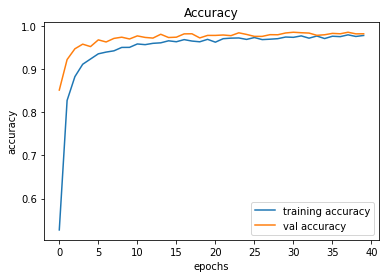

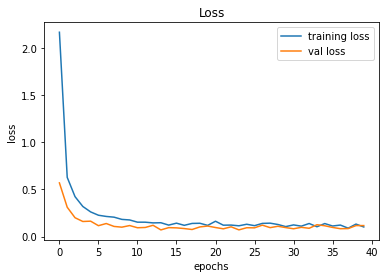

In [8]:
# This block is used to evaluate our models' hyperparameters by iteratively searching the input space
# and finding the optimal values through the learning curves
model = create_model()
model.summary()
epochs = 40
history = model.fit(X_train, y_train, batch_size=32, epochs=epochs, validation_data=(X_val, y_val))
model.save(os.path.join(cur_path,'keras_model.h5'))
iteration = 7
#Plotting accuracy graphs 
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
#plt.savefig(os.path.join(r'/content/drive/MyDrive/Traffic Sign Recognition/GTSRB/Plots',str(iteration)+' Set Accuracy .png'))
plt.show()

#Plotting loss graphs
plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
#plt.savefig(os.path.join(r'/content/drive/MyDrive/Traffic Sign Recognition/GTSRB/Plots',str(iteration)+' Set Loss .png'))
plt.show()

In [ ]:
# DON'T EXECUTE!!!
# Input the testing data
test = pd.read_csv(os.path.join(cur_path,'GTSRB/Testing/GT-final_test.csv'),delimiter=';')
test_imgs = test["Filename"].values
test_data=[]
for img in test_imgs:
    print(counter)
    image = Image.open(os.path.join(cur_path,'GTSRB/Testing',img))
    image = image.resize((30,30))
    test_data.append(np.array(image))
X_test = np.array(test_data)
y_test = test['ClassId'].values
np.save( os.path.join(cur_path,'test_data.npy'), X_test)
np.save(os.path.join(cur_path,'test_labels.npy'), y_test) 

In [9]:
# Load testing data
X_test = np.load(os.path.join(cur_path,'test_data.npy'))
y_test = np.load(os.path.join(cur_path,'test_labels.npy'))
# Make prediction on the test dataset
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)
y_pred = to_categorical(y_pred, 43) 

print("Final accuracy score is %.5f percent " %(accuracy_score(y_test, y_pred)*100))

Final accuracy score is 88.40063 percent 


In [ ]:
# DON'T EXECUTE!!!
# Part 2 of the assignment
# Reload the testing images, and distort them by applying a gaussian noise function 
from matplotlib import pyplot as plt
test = pd.read_csv(os.path.join(cur_path,'GTSRB/Testing/GT-final_test.csv'),delimiter=';')
y_test = test['ClassId'].values
test_imgs = test["Filename"].values
noisy_test_data=[]
counter=0
for img in test_imgs:
    image = Image.open(os.path.join(cur_path,'GTSRB/Testing',img))
    image = noise(np.array(image)).astype(np.uint8)
    image = Image.fromarray(image, 'RGB')
    image = image.resize((30,30))
    noisy_test_data.append(np.array(image))
noisy_X_test=np.array(noisy_test_data)

# Save noisy images
np.save( os.path.join(cur_path,'noisy_test_data.npy'), noisy_X_test)
 

In [10]:
# Make a prediction on the distorted images
noisy_X_test = np.load(os.path.join(cur_path,'noisy_test_data.npy'))
y_pred = model.predict(noisy_X_test)
y_pred = np.argmax(y_pred, axis=1)
y_pred = to_categorical(y_pred, 43) 
print("Final accuracy score of noisy dataset is %.5f percent " %(accuracy_score(y_test, y_pred)*100))

Final accuracy score of noisy dataset is 42.21694 percent 


In [ ]:
# This block is used to evaluate our models' hyperparameters by iteratively searching the input space
# and finding the optimal values through the learning curves
import skimage.io
import skimage.filters
from skimage.filters import unsharp_mask

def noise(image):
    row,col,ch= image.shape      
    gauss = np.array(image.shape)
    gauss = np.random.standard_normal(size=(row,col))
    for i in range(0,3):
      image[:,:,i] = image[:,:,i] + 25.5*gauss
    return image


# Define a denoising function
def denoise(image):
    new_image = cv2.medianBlur(image,3)
    sharped = unsharp_mask(new_image, radius=3, amount=2)
    sharped[sharped>255] = 255
    sharped[sharped<0] = 0
    return sharped

model = create_model()
model.summary()
epochs = 40
history = model.fit(X_train, y_train, batch_size=32, epochs=epochs, validation_data=(X_val, y_val))
model.save(os.path.join(cur_path,'keras_model.h5'))
iteration = 7
#Plotting accuracy graphs 
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
#plt.savefig(os.path.join(r'/content/drive/MyDrive/Traffic Sign Recognition/GTSRB/Plots',str(iteration)+' Set Accuracy .png'))
plt.show()

#Plotting loss graphs
plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
#plt.savefig(os.path.join(r'/content/drive/MyDrive/Traffic Sign Recognition/GTSRB/Plots',str(iteration)+' Set Loss .png'))
plt.show()

In [331]:
import skimage.io
import skimage.filters
from skimage.filters import unsharp_mask

def noise(image):
    row,col,ch= image.shape      
    gauss = np.array(image.shape)
    gauss = np.random.standard_normal(size=(row,col))
    m = 0
    s = 1
    gauss = cv2.randn(gauss,m,s);
    for i in range(0,3):
      image[:,:,i] = image[:,:,i] + 25.5*gauss
    return image


# Define a denoising function
def denoise(image):
    kernel = np.array([[0, -1, 0],
                   [-1, 5,-1],
                   [0, -1, 0]])
    
    new_image = cv2.medianBlur(image,3)
    image_sharp = cv2.filter2D(src=new_image, ddepth=-1, kernel=kernel)
    return new_image

test = pd.read_csv(os.path.join(cur_path,'GTSRB/Testing/GT-final_test.csv'),delimiter=';')
y_test = test['ClassId'].values
y_test = to_categorical(y_test, 43) 
test_imgs = test["Filename"].values
denoised_test_data=[]
counter=0
for img in test_imgs[10000:11000]:
    image = Image.open(os.path.join(cur_path,'GTSRB/Testing',img))
   
    image = noise(np.array(image)).astype(np.uint8)
    
    image = denoise(image)
    
    image = Image.fromarray(image, 'RGB')

    image = image.resize((30,30))
    denoised_test_data.append(np.array(image))
denoised_X_test=np.array(denoised_test_data)

# Save recovered images
np.save( os.path.join(cur_path,'denoised_test_data.npy'), denoised_X_test)

In [332]:
 # Make a prediction on the recovered images
denoised_X_test = np.load(os.path.join(cur_path,'denoised_test_data.npy'))
y_pred = model.predict(denoised_X_test)
y_pred = np.argmax(y_pred, axis=1)
y_pred = to_categorical(y_pred, 43) 
print("Final accuracy score of denoised dataset is %.5f percent " %(accuracy_score(y_test[10000:11000], y_pred)*100))

Final accuracy score of denoised dataset is 40.40000 percent 


In [ ]:
# Part 3 of the assignment
from keras.models import load_model
model1 = load_model(os.path.join(cur_path,'keras_model.h5'))

import torch
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
	def __init__(self):
		super(Net, self).__init__()
		
		self.conv1 = nn.Conv2d(3, 16, 5)
		self.conv2 = nn.Conv2d(16, 32, 3)
		self.fc1 = nn.Linear(800, 256)
		self.fc2 = nn.Linear(256, 43)

	def forward(self, x):
		x = F.relu(self.conv1(x))
		x = F.max_pool2d(x,2)
		x = F.dropout(x)
		x = F.relu(self.conv2(x))
		x = F.max_pool2d(x,2)
		x = F.dropout(x)
		x = torch.flatten(x, 1) # flatten all dimensions except batch
		x = F.relu(self.fc1(x))
		x = F.dropout(x)
		x = F.Softmax(self.fc2(x))
		return x

net = Net()
print(net)

# Get the pre-trained weights
weights = model1.get_weights()
net.conv1.weight.data=torch.from_numpy(np.transpose(weights[0]))
net.conv1.bias.data=torch.from_numpy(np.transpose(weights[1]))
net.conv2.weight.data=torch.from_numpy(np.transpose(weights[2]))
net.conv2.bias.data=torch.from_numpy(np.transpose(weights[3]))

net.fc1.weight.data=torch.from_numpy(np.transpose(weights[4]))
net.fc1.bias.data=torch.from_numpy(np.transpose(weights[4]))
net.fc2.weight.data=torch.from_numpy(np.transpose(weights[6]))
net.fc2.bias.data=torch.from_numpy(np.transpose(weights[7]))


Net(
  (conv1): Conv2d(3, 16, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=800, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=43, bias=True)
)
